In [1]:
import numpy as np
from IPython import embed
from statsmodels.tsa.arima.model import ARIMA


class ARIMAModel:
    def __init__(self, anomaly_ts_num: float = 0.5):
        self.anomaly_ts_num = anomaly_ts_num
        self.diff_upper_threshold_list = []

    def _arima_model(self, ts):
        assert len(ts.shape) == 1, 'Only support 1-d time series currently'
        ar_result = np.zeros(ts.shape)
        model = ARIMA(ts, order=(2, 0, 0))
        model_fit = model.fit()
        fittedLen = model_fit.fittedvalues.shape[0]
        ar_result[ts.shape[0] - fittedLen:] = model_fit.fittedvalues
        ar_result[:ts.shape[0] - fittedLen] = ts[:ts.shape[0] - fittedLen]
        return ar_result


In [2]:
ar = ARIMAModel()

In [3]:
ts = np.array([1,1,1,19,2,2,2,3,43,5,62,3,4] * 10)

In [4]:
ts.shape

(130,)

In [5]:
ar_result = ar._arima_model(ts)

In [6]:
ar_result

array([11.30511312, 13.04140009,  9.51193316,  9.51193316,  7.36809269,
       14.66882907,  9.68594192,  9.68594192,  9.56683968,  5.09586074,
       21.34618654,  3.41914003, 27.15350021,  9.74084844, 10.39126619,
        9.51193316,  9.51193316,  7.36809269, 14.66882907,  9.68594192,
        9.68594192,  9.56683968,  5.09586074, 21.34618654,  3.41914003,
       27.15350021,  9.74084844, 10.39126619,  9.51193316,  9.51193316,
        7.36809269, 14.66882907,  9.68594192,  9.68594192,  9.56683968,
        5.09586074, 21.34618654,  3.41914003, 27.15350021,  9.74084844,
       10.39126619,  9.51193316,  9.51193316,  7.36809269, 14.66882907,
        9.68594192,  9.68594192,  9.56683968,  5.09586074, 21.34618654,
        3.41914003, 27.15350021,  9.74084844, 10.39126619,  9.51193316,
        9.51193316,  7.36809269, 14.66882907,  9.68594192,  9.68594192,
        9.56683968,  5.09586074, 21.34618654,  3.41914003, 27.15350021,
        9.74084844, 10.39126619,  9.51193316,  9.51193316,  7.36

In [7]:
ar_result.shape

(130,)

In [8]:
import matplotlib.pyplot as plt

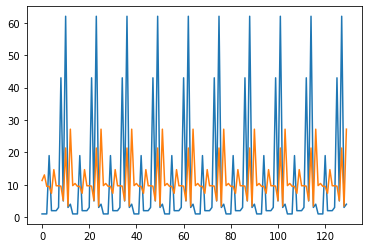

In [9]:
plt.plot(ts)
plt.plot(ar_result)